# Demultiplexing and Index Swapping

**Quality score distribution per nucleotide**

Determine which files contain the indexes, and which contain the paired end reads
containing the biological data of interest. Create a table and label each file with either
read1, read2, index1, or index2.

    $ zcat 1294_S1_L008_R1_001.fastq.gz | head -10

|File | Label |
|---|---|
|1294_S1_L008_R1_001.fastq.gz | Read 1 |
|1294_S1_L008_R1_002.fastq.gz | Index 1 |
|1294_S1_L008_R1_003.fastq.gz | Index 2 |
|1294_S1_L008_R1_004.fastq.gz | Read 2 |

Generate per base call distribution of quality scores for read1, read2, index1, and
index2. Average the QSs for each read and generate a per nucleotide distribution.

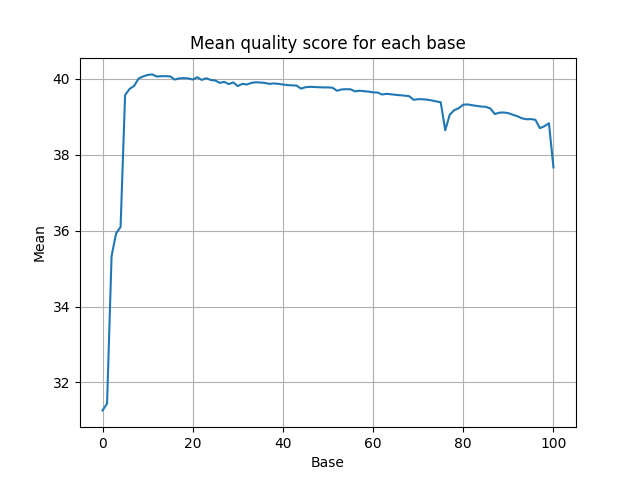

In [25]:
from IPython.display import Image
Image(filename='1294_S1_L008_R1_001_avg_qscores.png') 

**Figure 1. Mean quality scores per base for Read 1.**

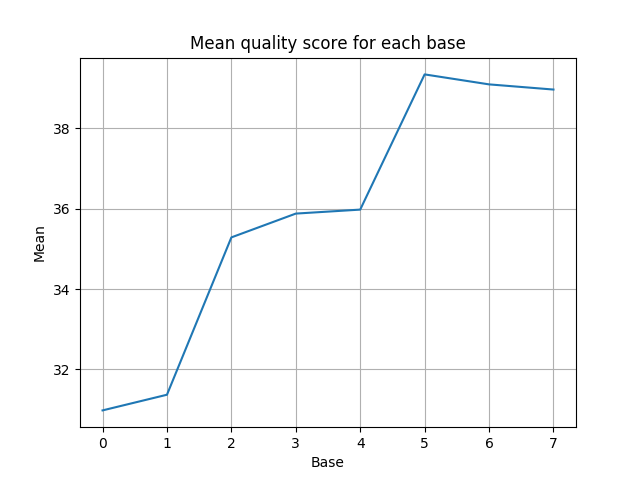

In [22]:
Image(filename='1294_S1_L008_R2_001_avg_qscores.png')  

**Figure 2. Mean quality scores per base for Index 1.**

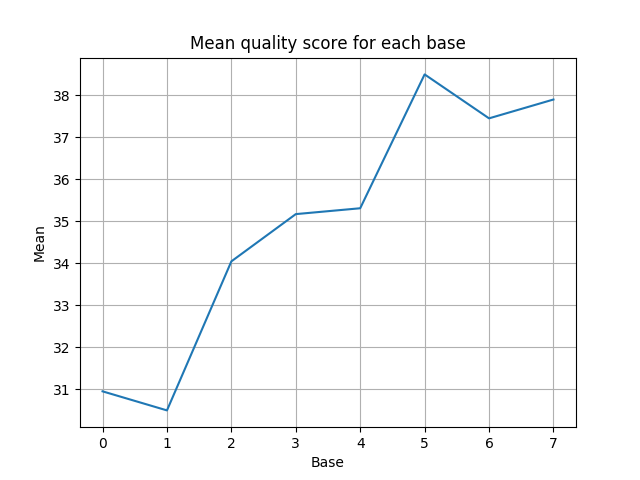

In [23]:
Image(filename='1294_S1_L008_R3_001_avg_qscores.png')  

**Figure 3. Mean quality scores per base for Index 2.**

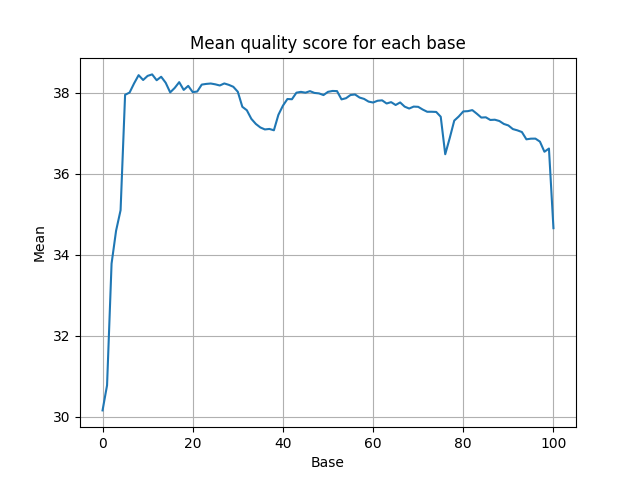

In [24]:
Image(filename='1294_S1_L008_R4_001_avg_qscores.png')  

**Figure 4. Mean quality scores per base for Read 2.**

I think a good quality score cutoff for the indexes would be 30. That would be 99.9% accuracy, and depending on the hamming distance of the indexes we could be fairly confident that the indexes match the correct sample. A good quality score for pairs would be maybe slightly higher

Bash commands used to determine how many indexes have "N":

    $ zcat 1294_S1_L008_R2_001.fastq.gz | sed -n '2~4p' | grep -c "N"

    $ zcat 1294_S1_L008_R2_001.fastq.gz | sed -n '2~4p' | grep -c "N"

Index 1: 3976613

Index 2: 3328051

## Part 2: Develop an algorithm 

**Define the problem:** The problem is that we have a file containing reads from multiple different samples. In order to assemble genomes or align reads for each sample, they must be separated from the others. 


**Determine/describe what output would be informative:** An informative output would be files for each index that contain all the reads associated with that index. In addition, the number of swapped indexes, certainity in the index/read matches, and the number of good reads would be informative. 

In [20]:
# define a function to get the reverse complement of a sequence
    '''Takes a string containing A,G,C,T, or N. Returns a string of the same length containing the reverse complement. For example, AAT should return TAA.'''
    # reversed = string([::-1])
    # Iterate over the string: while i < len(string):
        # if string(i) == 'A':
            # string(i) == 'T'
        # elif string(i) == 'T':
            # string(i) == 'A'
        # elif string(i) == 'C':
            # string(i) == 'G'
        # elif string(i) == 'G':
            # string(i) == 'C'

# set global variables to track the number of hopped reads
# hopped = 0
# create a dictionary for tracking the number of good reads per index. The keys are the index (just Index1), value is number of good reads for that index.  
# good_reads_dict = {}

# Open file1: Index 1
    # open file2: Read 1 (F)
        # open file3: Index 2
            # open file4: Read 2 (R)
                # Loop: while True (will be false once end of file is reached)
                    # index1.readline() method for the 4 lines of Index1 file, store the actual index (the first line) as a variable called Index1
                    # If the first line == "": the end of the file has been reached
                        # break
                    # read1.readline() method for the 4 lines of Read1 file, store all 4 lines as variables
                    # index2.readline() method for the 4 lines of Index2 file, store the actual index as a variable called Index2
                    # read2.readline() method for the 4 lines of Read2 file, store all 4 lines as variables 
                    # reverseCompIndex1 = reverse_complement(Index1)
                    # If reverseCompIndex1 == Index2, no index hopping has occurred 
                        # Open the file corresponding to index1 as "a" (append, so overwriting does not occur)
                            # Write the 4 lines from Read1 stored above to this file
                        # Open the file corresponding to Index2 as "a"
                            # Write the 4 lines from Read2 stored above to this file 
                        # good_reads_dict[Index1] += 1
                    # If reverseCompIndex1 != Index2, index hopping has occurred
                        # Open the index hopping Read1 file
                            # Write the 4 lines from Read1
                        # Open the index hopping Read2 file
                            # Write the 4 lines from Read 2
                        # hopped += 1
                    
                    
# Iterate over the dictionary to get total number of good reads, add to variable called total_reads
# add number of hopped reads to total_reads
# divide number of hopped reads by total reads, mulitply by 100 to get percentage of hopped reads
# iterate over good reads dictionary to print out index and number of good reads for that index 

**Develop an algorithm to de-multiplex the samples**